In [1]:
import numpy as np
import pandas as pd
import math
import os
import shutil
import scipy.io as sio
import matplotlib.pyplot as plt
import os
from os.path import join, basename, dirname
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from glob import glob

In [13]:
matpath = '/data/bswift-1/Pessoa_Lab/eCON/dataset/results_ShockUncensored/CON001/controllable/splitted_regs/ROI_analysis/noProx/buttonPress/subj001.xmat.1D'
raw_cols = open(matpath,'r').readlines()[3].split('"')[1].split(';')
cols = [y for y in [x for x in raw_cols if "Run" not in x] if "Motion" not in y]

In [14]:
design = np.loadtxt(matpath)
tmp_df = pd.DataFrame(design,columns=raw_cols)
df_corr = tmp_df[cols].corr()

In [15]:
cols

[' signNearest#0 ',
 ' signNear#0 ',
 ' signFar#0 ',
 ' magNearest#0 ',
 ' magNear#0 ',
 ' magFar#0 ',
 ' signXmagNearest#0 ',
 ' signXmagNear#0 ',
 ' signXmagFar#0 ',
 ' v_motion#0 ',
 ' onset_block#0 ',
 ' offset_block#0 ',
 ' onset_shock1#0 ',
 ' onset_shock2#0 ',
 ' onset_shock3#0 ',
 ' onset_shock4#0 ',
 ' onset_shock5#0 ',
 ' button_press1#0 ',
 ' button_press2#0 ',
 ' button_press3#0 ',
 ' button_press4#0 ',
 ' button_press5#0 ']

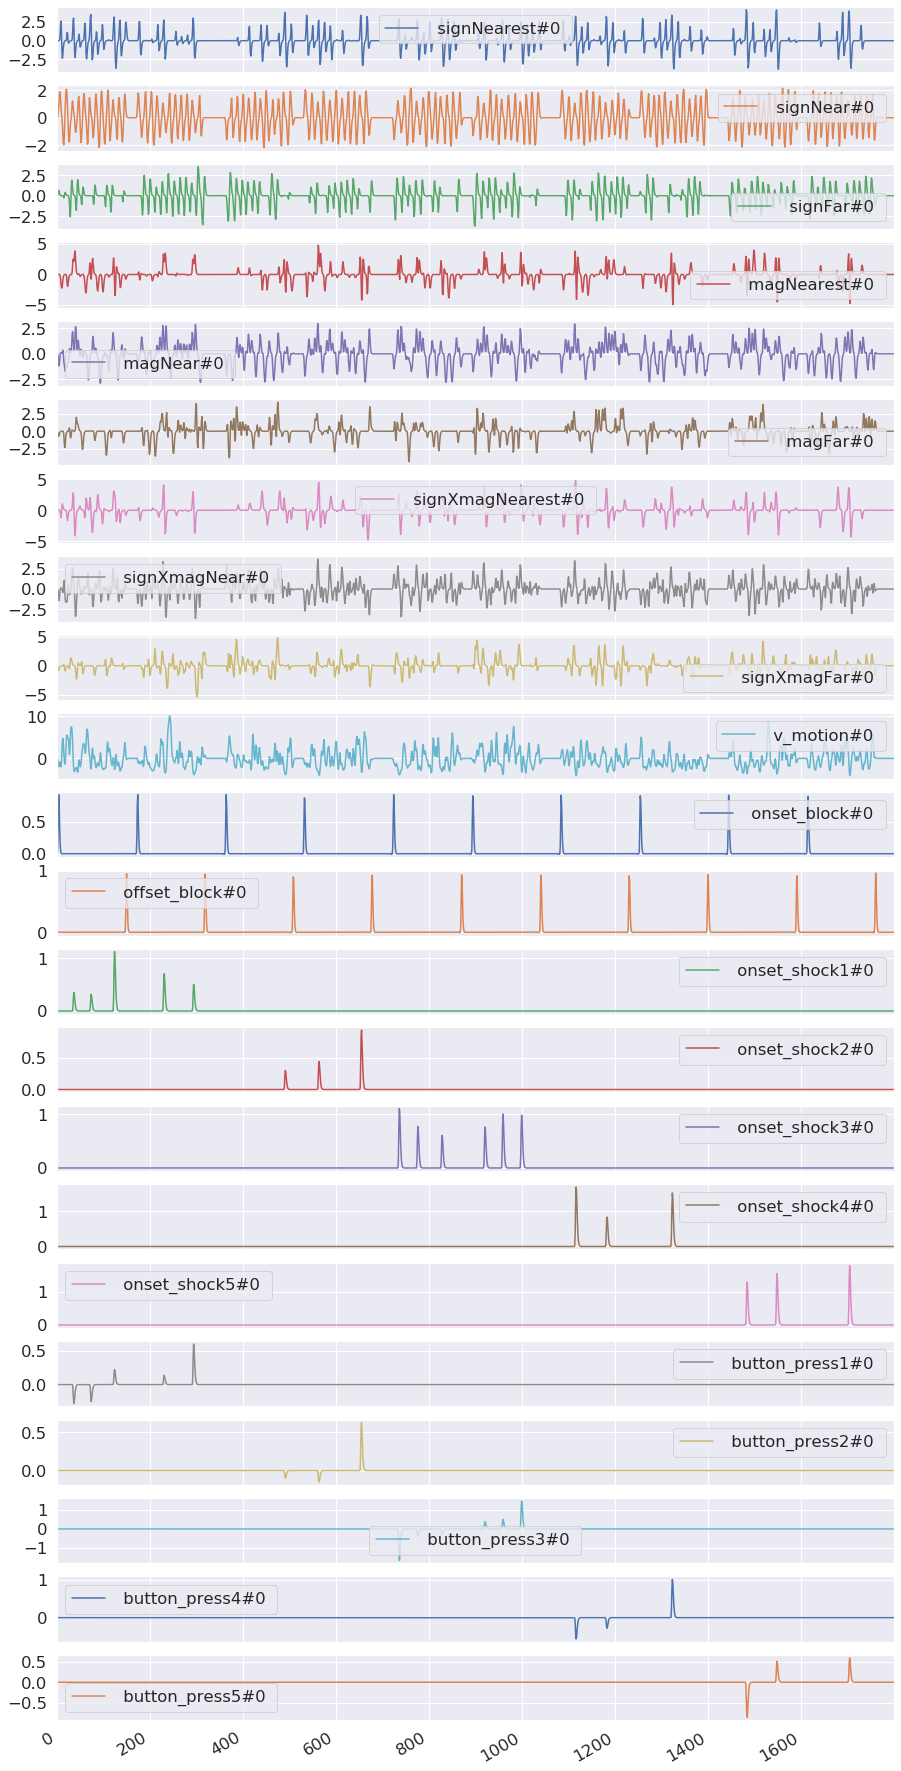

In [16]:
_=tmp_df[cols].plot(subplots=True,figsize=(15,35))

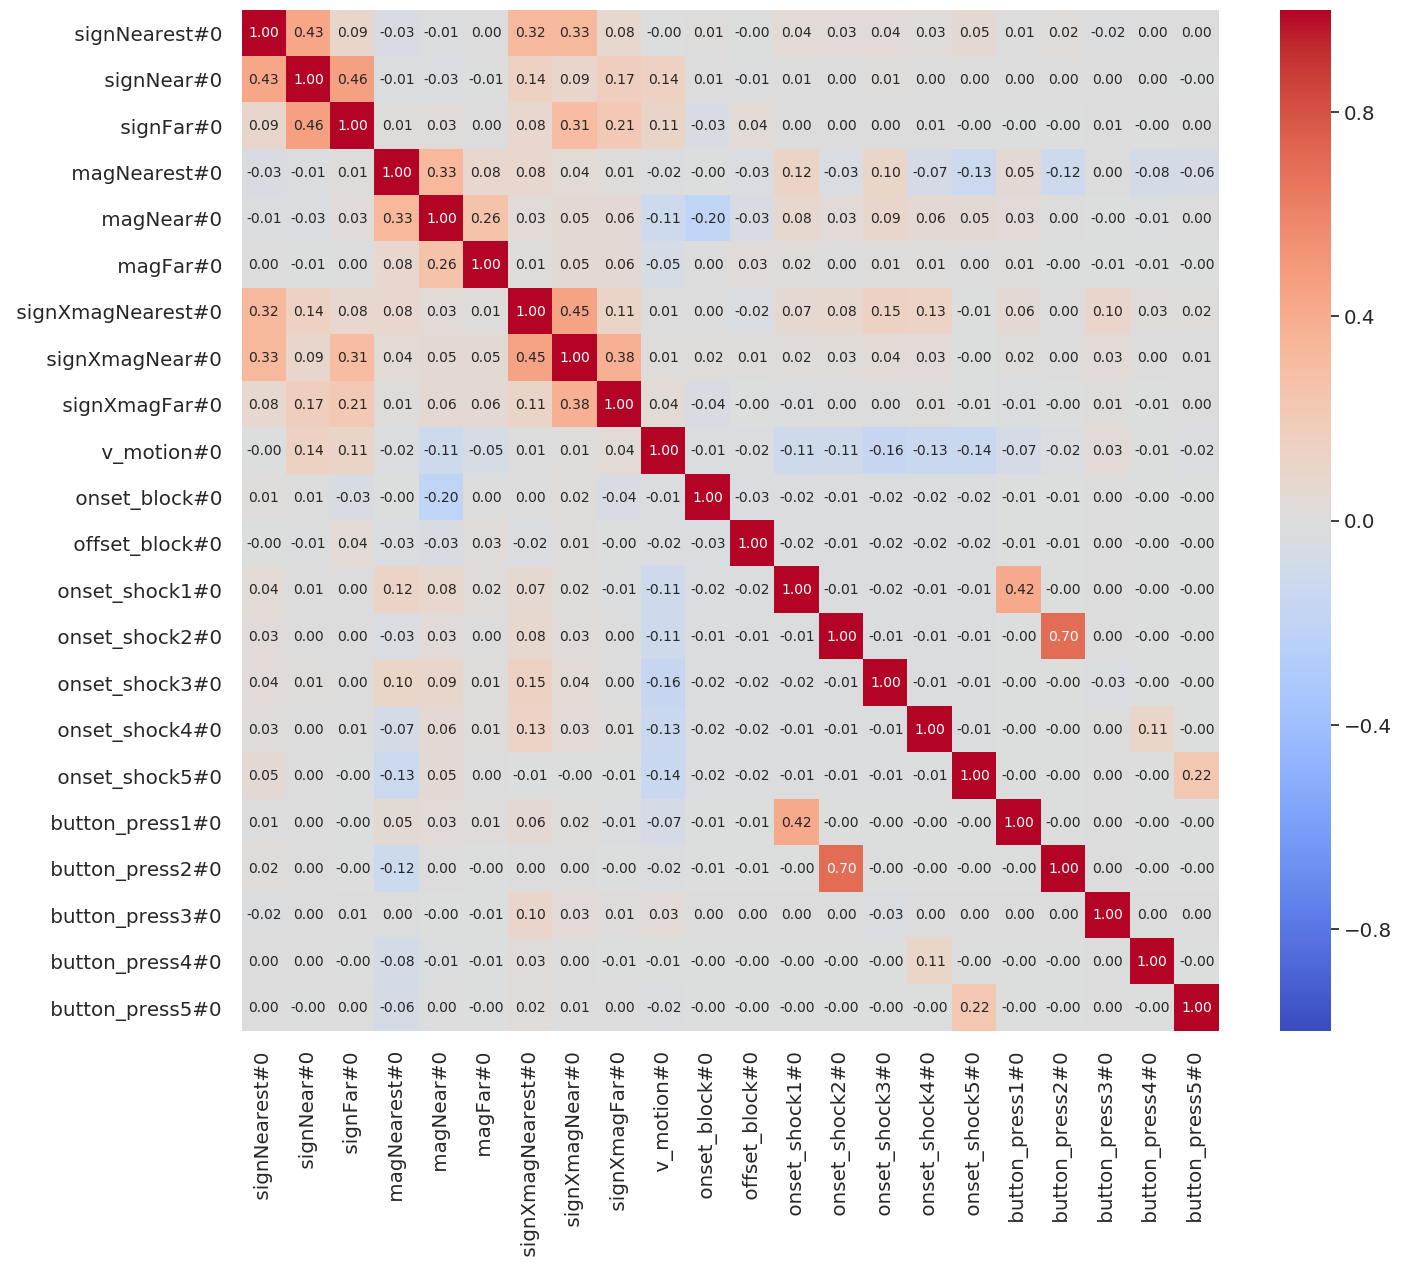

In [7]:
sns.set(font_scale=1.3)
fig = plt.figure(dpi = 100)
fig.set_size_inches(15,13,forward=True)
ax = sns.heatmap(df_corr, vmin=-1
                 ,vmax=1, center=0, cmap='coolwarm',annot=True, fmt='.2f', annot_kws={"size": 10})
plt.tight_layout()

In [8]:
df_for_VIF = tmp_df[cols]
df_for_VIF = sm.add_constant(df_for_VIF)
VIF_df = pd.DataFrame()
VIF_df['Feature'] = df_for_VIF.columns
VIF_df['VIF'] = [variance_inflation_factor(df_for_VIF.values, i) for i in range(df_for_VIF.shape[1])]

/home/climbach/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


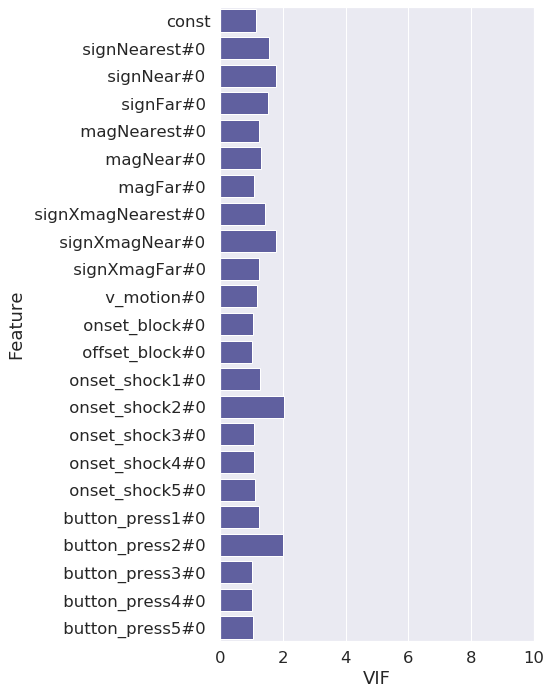

In [9]:
plt.figure(figsize=(8,10))
sns.set(font_scale=1.5)
sns.barplot(y='Feature',x='VIF',data=VIF_df,saturation=0.25,capsize=0.25,color='blue')
plt.xlim(0, 10)
plt.tight_layout()
#plt.savefig('figures/model3_VIFs.png')

In [10]:
VIF_df[VIF_df['VIF']==VIF_df['VIF'].max()]

,Feature,VIF
14,onset_shock2#0,2.023812


### Correlations and VIF of 3dLSS model

In [35]:
matpath = '/data/bswift-1/Pessoa_Lab/eCON/dataset/results_ShockUncensored/CON001/controllable/splitted_regs/ROI_analysis/noProx/buttonPress/shock_IM/subj001.xmat.1D'
raw_cols = open(matpath,'r').readlines()[3].split('"')[1].split(';')
cols = [col for col in raw_cols if col not in [' nuisance[%i]#0 ' %(i) for i in list(range(25)) + list(range(42,54))]]
del cols[-1]

In [36]:
design = np.loadtxt(matpath)
tmp_df = pd.DataFrame(design,columns=raw_cols)
df_corr = tmp_df[cols].corr()

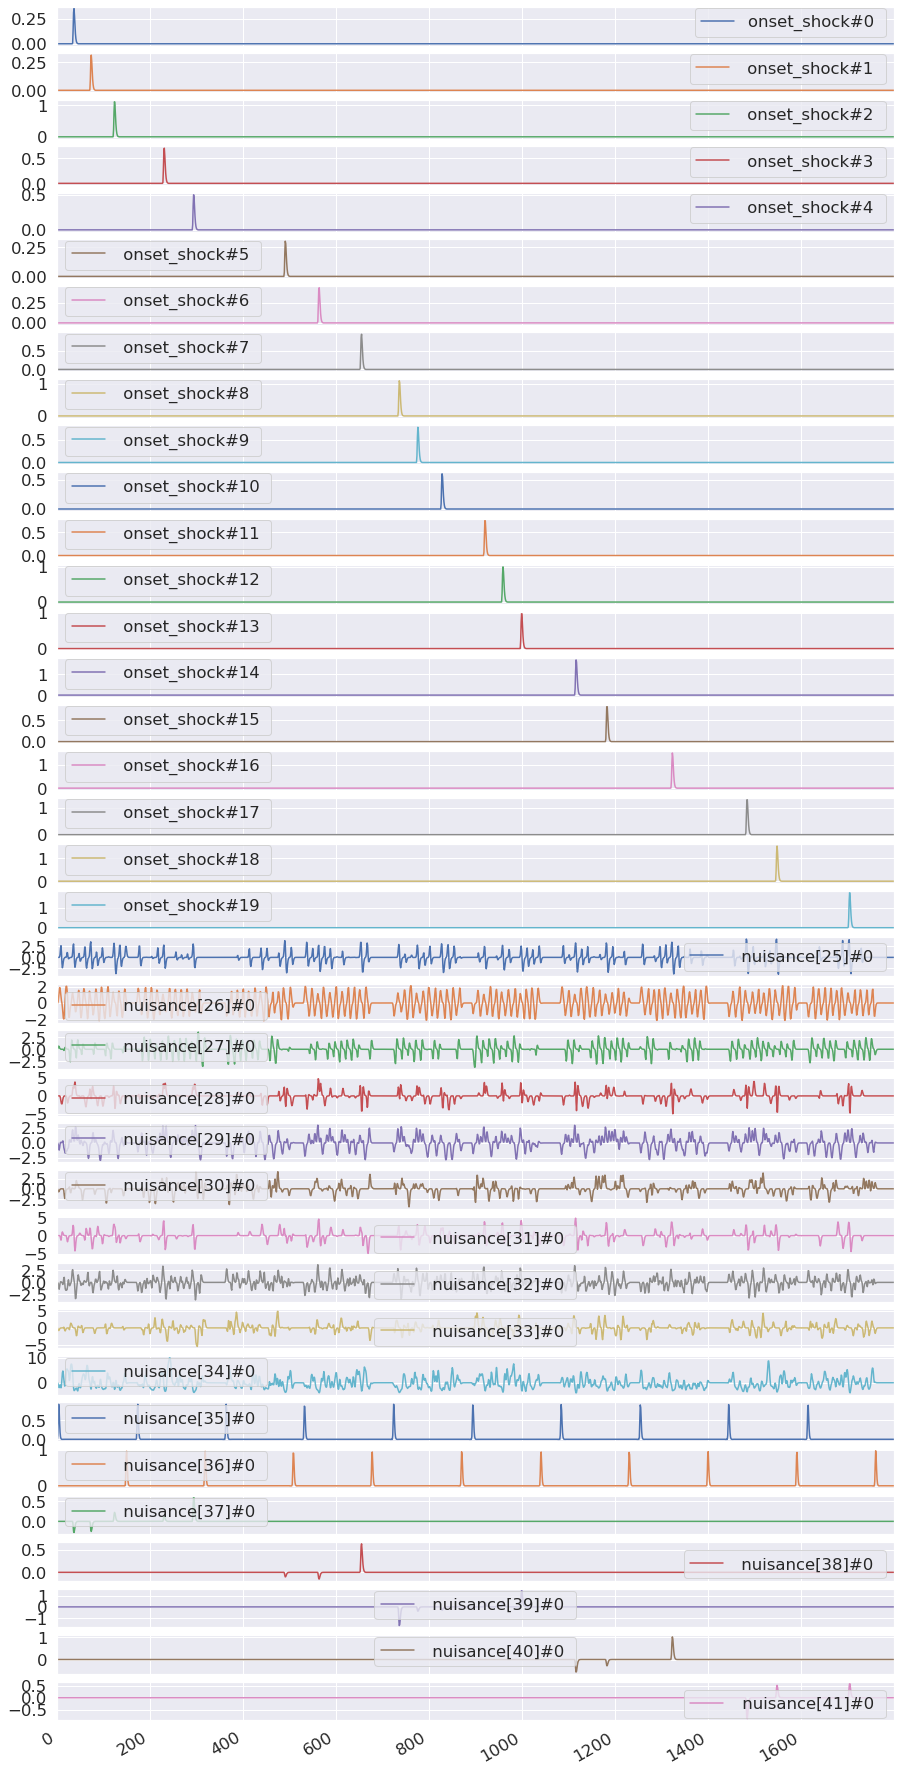

In [37]:
_=tmp_df[cols].plot(subplots=True,figsize=(15,35))

In [48]:
shock_regs = tmp_df[[col for col in cols if 'onset_shock' in col]]
new_df = tmp_df[[col for col in cols if col not in shock_regs.columns]]
new_df['onset_shock1'] = shock_regs.iloc[:,0]
new_df['onset_shock_rest'] = shock_regs.iloc[:,1:].sum(axis=1)

/home/climbach/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/climbach/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


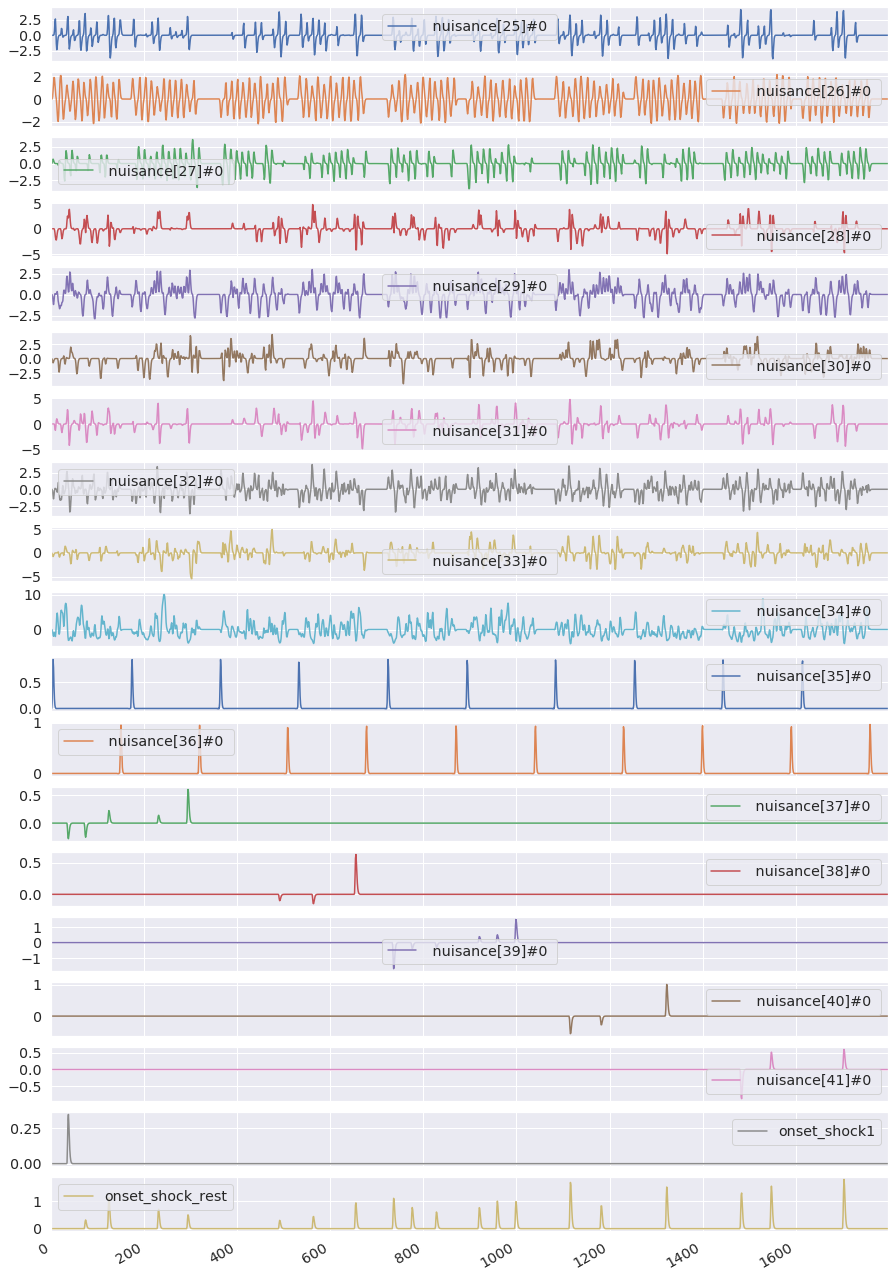

In [50]:
_=new_df.plot(subplots=True,figsize=(15,25))

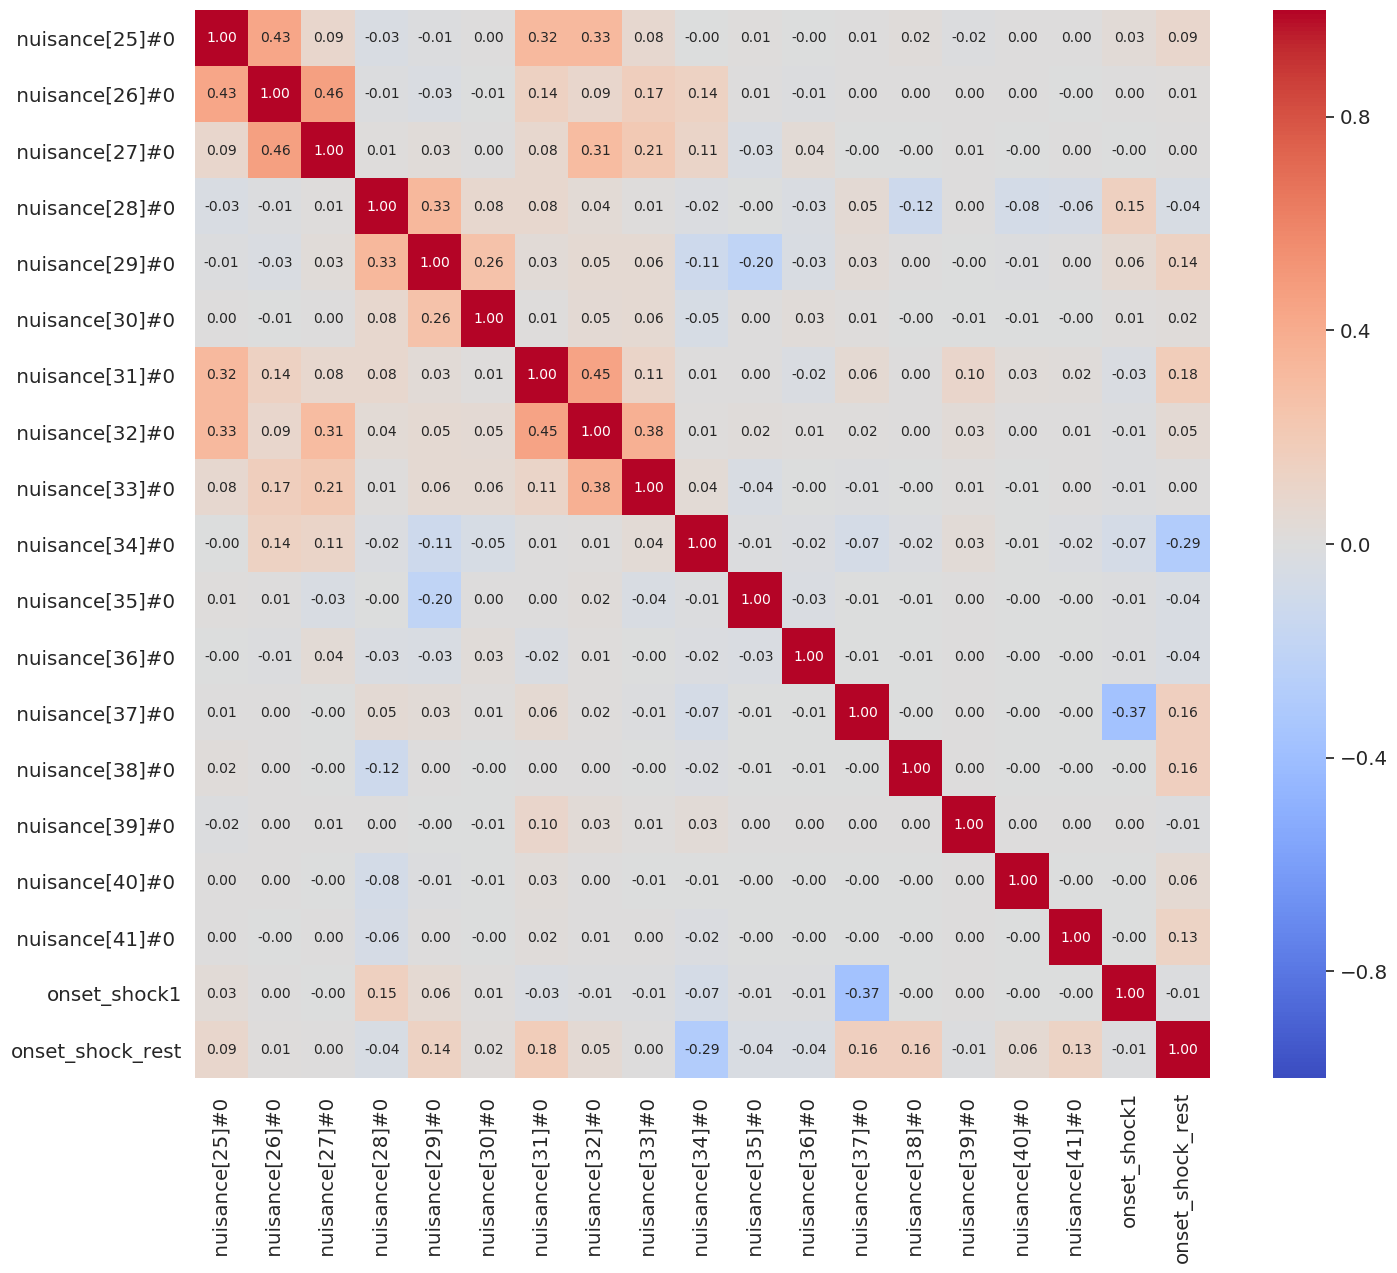

In [51]:
sns.set(font_scale=1.3)
fig = plt.figure(dpi = 100)
fig.set_size_inches(15,13,forward=True)
ax = sns.heatmap(new_df.corr(), vmin=-1
                 ,vmax=1, center=0, cmap='coolwarm',annot=True, fmt='.2f', annot_kws={"size": 10})
plt.tight_layout()

In [52]:
df_for_VIF = new_df
df_for_VIF = sm.add_constant(df_for_VIF)
VIF_df = pd.DataFrame()
VIF_df['Feature'] = df_for_VIF.columns
VIF_df['VIF'] = [variance_inflation_factor(df_for_VIF.values, i) for i in range(df_for_VIF.shape[1])]

/home/climbach/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


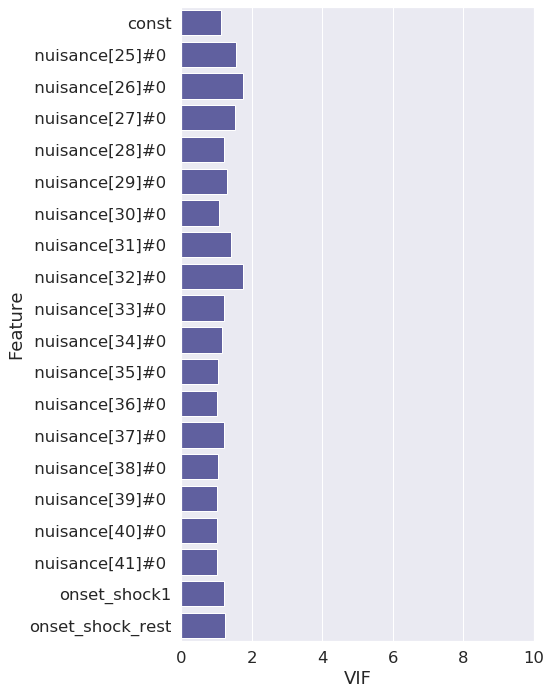

In [53]:
plt.figure(figsize=(8,10))
sns.set(font_scale=1.5)
sns.barplot(y='Feature',x='VIF',data=VIF_df,saturation=0.25,capsize=0.25,color='blue')
plt.xlim(0, 10)
plt.tight_layout()
#plt.savefig('figures/model3_VIFs.png')

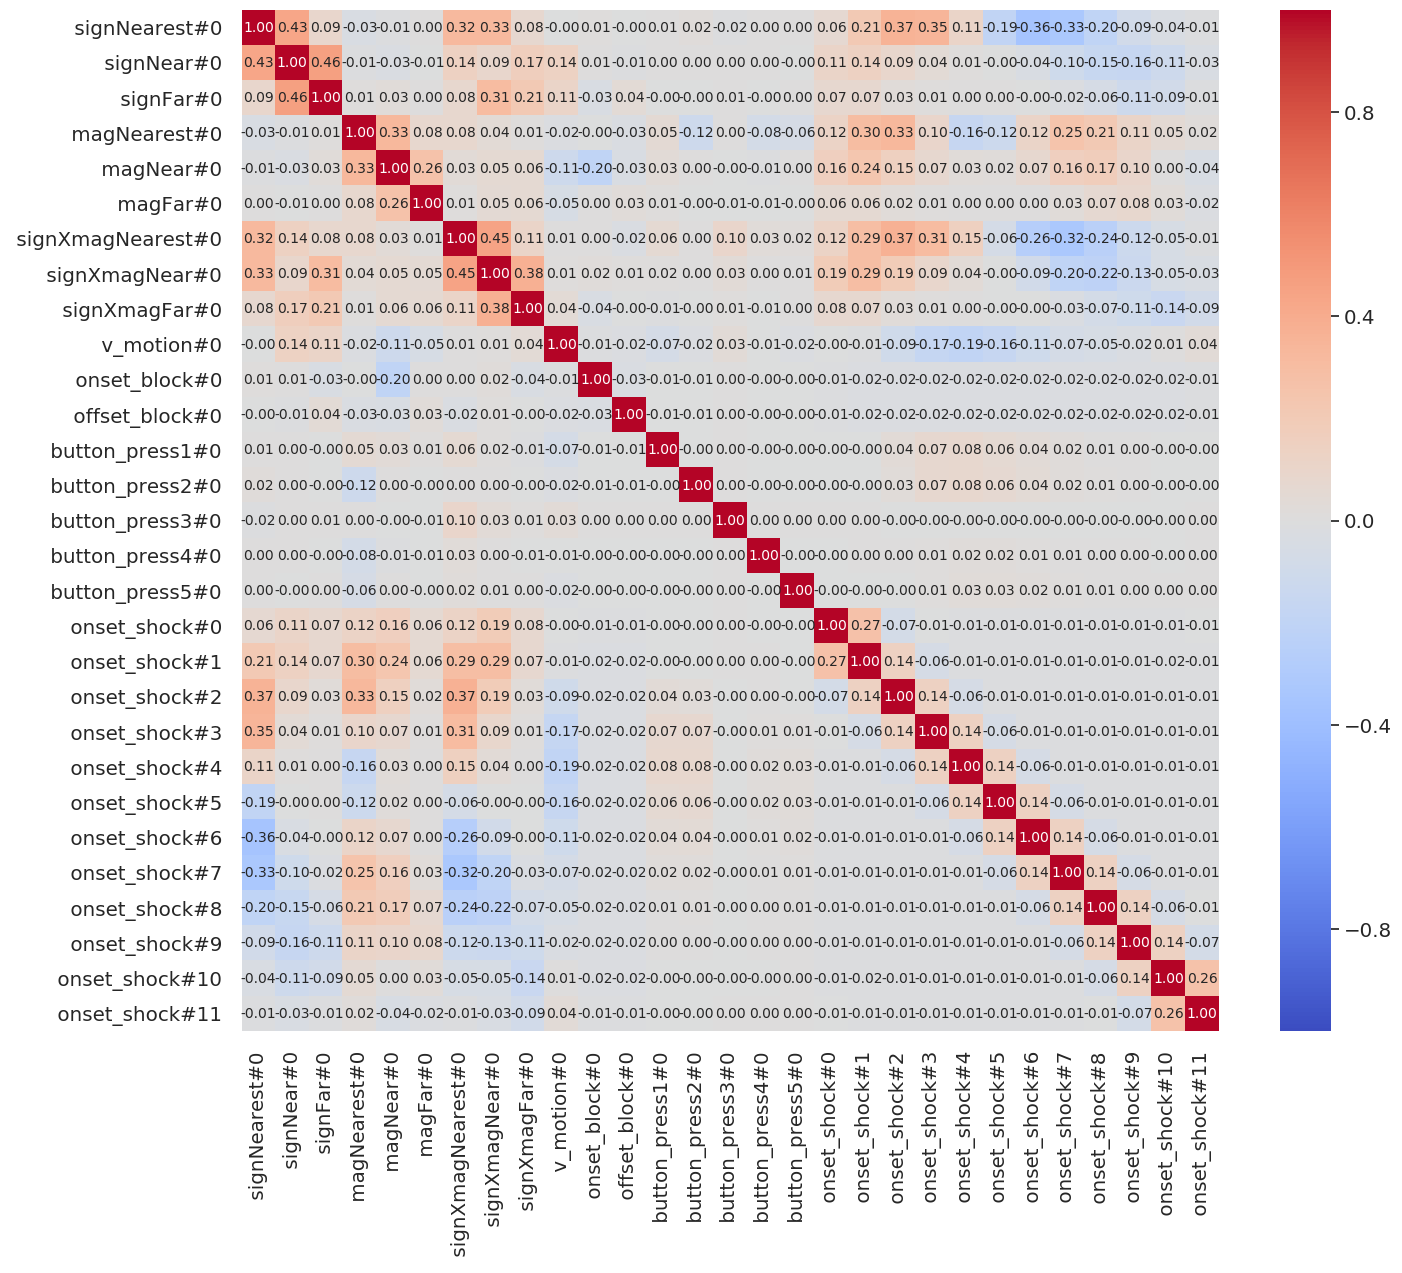

In [12]:
matpath = '/data/bswift-1/Pessoa_Lab/eCON/dataset/results_ShockUncensored/CON001/controllable/splitted_regs/ROI_lPI/noProx/buttonPress/shock_deconv/subj001.xmat.1D'
raw_cols = open(matpath,'r').readlines()[3].split('"')[1].split(';')
cols = [y for y in [x for x in raw_cols if "Run" not in x] if "Motion" not in y]

design = np.loadtxt(matpath)
tmp_df = pd.DataFrame(design,columns=raw_cols)
df_corr = tmp_df[cols].corr()


sns.set(font_scale=1.3)
fig = plt.figure(dpi = 100)
fig.set_size_inches(15,13,forward=True)
ax = sns.heatmap(df_corr, vmin=-1
                 ,vmax=1, center=0, cmap='coolwarm',annot=True, fmt='.2f', annot_kws={"size": 10})
plt.tight_layout()

In [13]:
df_for_VIF = tmp_df[cols]
df_for_VIF = sm.add_constant(df_for_VIF)
VIF_df = pd.DataFrame()
VIF_df['Feature'] = df_for_VIF.columns
VIF_df['VIF'] = [variance_inflation_factor(df_for_VIF.values, i) for i in range(df_for_VIF.shape[1])]

/home/climbach/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


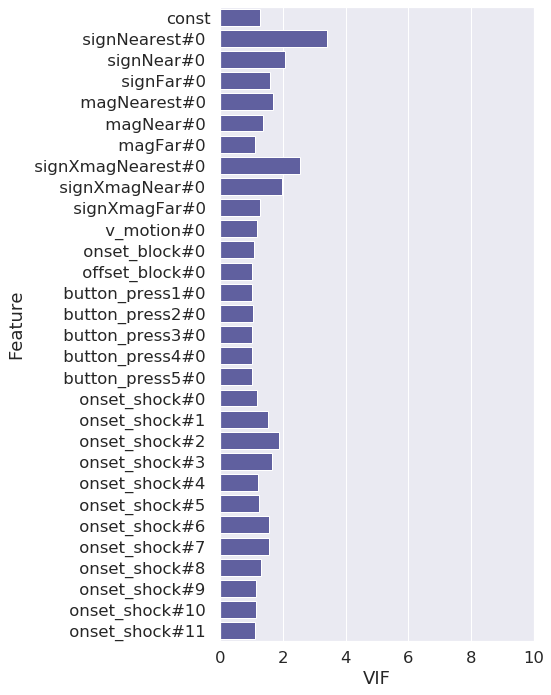

In [14]:
plt.figure(figsize=(8,10))
sns.set(font_scale=1.5)
sns.barplot(y='Feature',x='VIF',data=VIF_df,saturation=0.25,capsize=0.25,color='blue')
plt.xlim(0, 10)
plt.tight_layout()
#plt.savefig('figures/model3_VIFs.png')

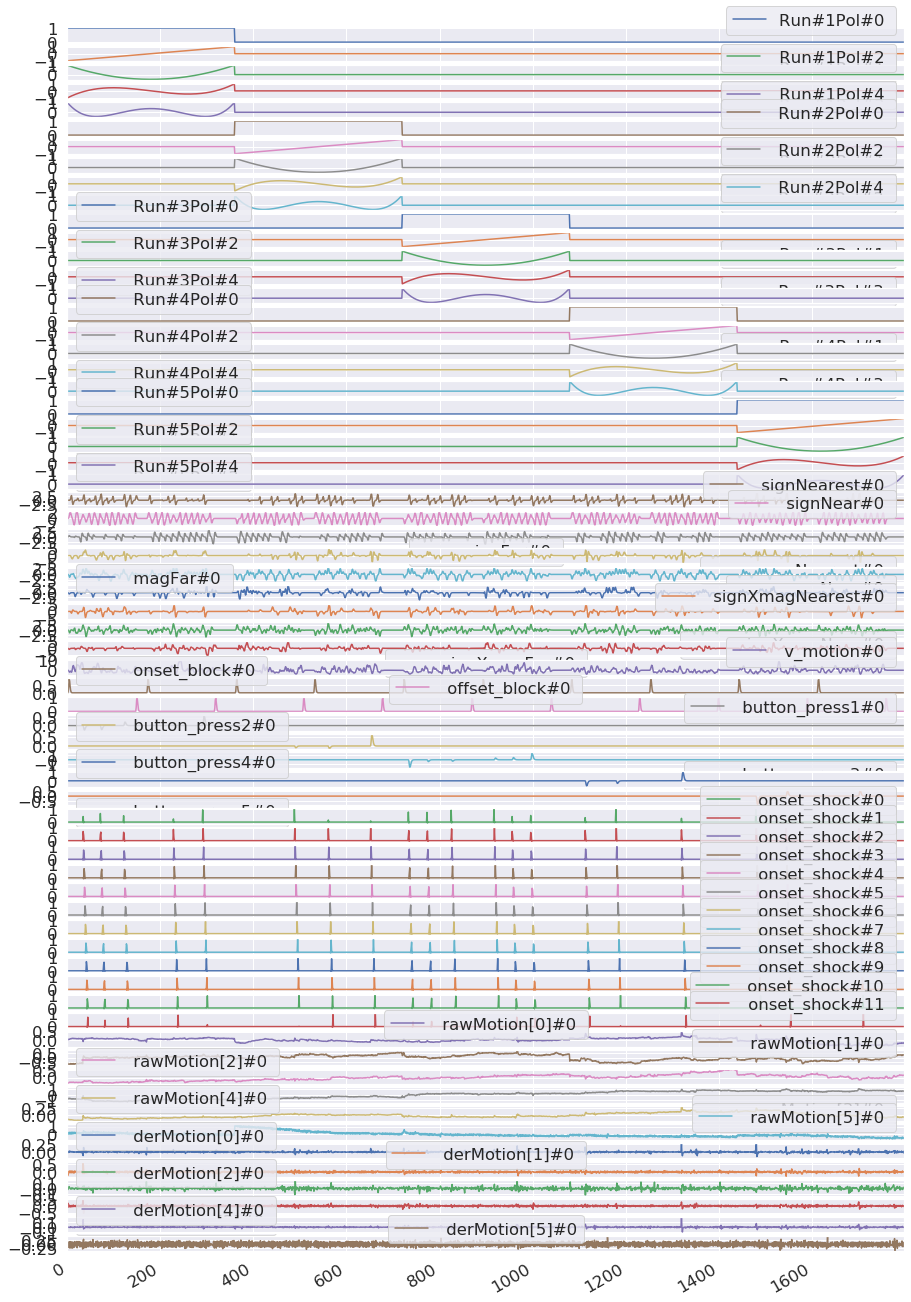

In [15]:
_=tmp_df.plot(subplots=True,figsize=(15,25))